<a href="https://colab.research.google.com/github/KonradLip/Portfolio/blob/main/traffic_signs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"konradlipiski","key":"0b8205379d837377e6f05290bd01bf22"}'}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!mkdir traffic_signs
%cd traffic_signs

/content/traffic_signs


In [6]:
!kaggle datasets list -s traffic-sign

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark   612MB  2018-11-25 18:12:34          85559        977  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                            4GB  2019-08-31 18:22:11          11172        252  1.0              
ahemateja19bec1025/traffic-sign-dataset-classification             Traffic Sign Dataset - Classification               190MB  2021-12-21 08:44:27           3060         61  0.9411765        
valentynsichkar/traffic-signs-dataset-in-yolo

In [7]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 
%cd ..

 98% 600M/612M [00:07<00:00, 178MB/s]
100% 612M/612M [00:07<00:00, 85.0MB/s]
/content


In [ ]:
!unzip /content/traffic_signs/gtsrb-german-traffic-sign.zip -d traffic_signs
!rm traffic_signs/gtsrb-german-traffic-sign.zip


## Importing necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [10]:
# Storing data and labels in lists
data =[]
labels =[]
# There are 43 classes in train file
classes = 43

In [11]:
# Getting our current path
%cd /content/traffic_signs
path = os.getcwd()
print(path)

/content/traffic_signs
/content/traffic_signs


In [12]:
# Speifying target size for images
target_size = (64, 64)

# Resizing images in order for model to work
for i in range(classes):
  img_path = os.path.join(path, 'train', str(i))
  images = os.listdir(img_path)
  for y in images:
    img = Image.open(img_path + '/' + y)
    img = img.resize(target_size)
    img = np.array(img)
    data.append(img)
    labels.append(i)

In [13]:
# Storing data and labels as arrays
data = np.array(data)
labels = np.array(labels)

In [14]:
# Dividing image pixels by 255 i.e normalization of data. It converts pixel values to fit in range 0 and 1
data = data/255

# Building a model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [16]:
# Converting labels to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
model = Sequential()
    
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))),
model.add(MaxPool2D((2, 2))),
model.add(Conv2D(64, (3, 3), activation='relu')),
model.add(MaxPool2D((2, 2))),
model.add(Flatten()),
model.add(Dense(64, activation='relu')),
model.add(Dense(classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Training the model with traffic sign data
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/3
981/981 [==============================] - 209s 213ms/step - loss: 0.0333 - accuracy: 0.9901 - val_loss: 0.1035 - val_accuracy: 0.9777
Epoch 2/3
981/981 [==============================] - 198s 202ms/step - loss: 0.0219 - accuracy: 0.9939 - val_loss: 0.1313 - val_accuracy: 0.9728
Epoch 3/3
981/981 [==============================] - 209s 213ms/step - loss: 0.0231 - accuracy: 0.9938 - val_loss: 0.0944 - val_accuracy: 0.9801


In [26]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)
model.summary()

246/246 - 13s - loss: 0.0944 - accuracy: 0.9801 - 13s/epoch - 52ms/step
Test loss: 0.09440916776657104
Test accuracy: 0.9801071286201477
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)         

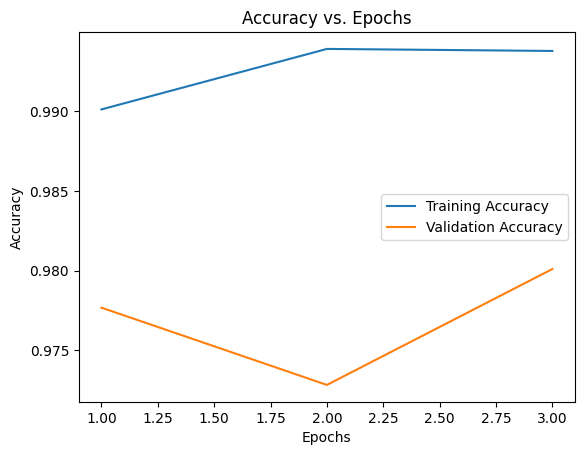

In [27]:
# Plotting the epochs training
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Creating a plot of accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()